In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import random
from sklearn.utils import shuffle
import shutil
from skimage.transform import resize
from PIL import Image
from IPython.display import display

In [2]:
def get_stats(df, suffix=None):
    """Provides a quick summary of a dataframe."""
    try:
        print(f"DF shape: {df.shape}")
        print(f"# Patients: {df.empi_anon.nunique()}")
        print(f"# Exams: {df.acc_anon.nunique()}")
        print(f"# Images dicom: {df.anon_dicom_path.nunique()}\n")

    except Exception as e:
        print(e)


pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 500)


## Read clinical and metadata rows
magview_path = "/content/EMBED_OpenData_clinical_reduced.csv"
metadata_path = "/content/EMBED_OpenData_metadata_reduced.csv"

# Load metadata
df_clinical = pd.read_csv(magview_path)
df_metadata = pd.read_csv(metadata_path)

df_clinical["procdate_anon"] = pd.to_datetime(
    df_clinical["procdate_anon"], errors="coerce"
)

df_clinical["study_date_anon"] = pd.to_datetime(
    df_clinical["study_date_anon"], errors="coerce"
)
df_metadata["study_date_anon"] = pd.to_datetime(
    df_metadata["study_date_anon"], errors="coerce"
)

# df_metadata = df_metadata.sort_values(by=['study_date_anon']).reset_index(drop=True)
df_metadata = df_metadata.sort_values(by=["empi_anon", "study_date_anon"]).reset_index(
    drop=True
)
df_clinical = df_clinical.sort_values(by=["empi_anon", "study_date_anon"]).reset_index(
    drop=True
)
df_metadata.to_csv("/content/EMBED_OpenData_metadata_reduced_sorted.csv", index=False)
df_clinical.to_csv("/content/EMBED_OpenData_clinical_reduced_sorted.csv", index=False)

print("clinical data input")
get_stats(df_clinical)
print("metadata data input")
get_stats(df_metadata)

display(df_metadata)
display(df_clinical)

<ipython-input-2-4a52487af88d>:22: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_clinical = pd.read_csv(magview_path)
<ipython-input-2-4a52487af88d>:23: DtypeWarning: Columns (27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df_metadata = pd.read_csv(metadata_path)


clinical data input
DF shape: (81776, 21)
# Patients: 23253
# Exams: 72770
'DataFrame' object has no attribute 'anon_dicom_path'
metadata data input
DF shape: (480323, 29)
# Patients: 23256
# Exams: 72770
# Images dicom: 480323



,Unnamed: 0,empi_anon,acc_anon,cohort_num,study_date_anon,StudyDescription,SeriesDescription,FinalImageType,ImageLateralityFinal,ViewPosition,spot_mag,anon_dicom_path,num_roi,ROI_coords,SRC_DST,match_level,Manufacturer,ManufacturerModelName,PatientSex,ProtocolName,SeriesNumber,SeriesTime,StudyID,WindowCenter,WindowWidth,has_pix_array,category,VOILUTFunction,WindowCenterWidthExplanation
0,22721,10000879,6992096043050201,1,2018-02-16,MG Screen Bilat w/Tomo/CAD Stnd Protocol,R MLO,2D,R,MLO,NaN,/mnt/NAS2/mammo/anon_dicom/cohort_1/10000879/1...,0,(),[],[],"HOLOGIC, Inc.",Selenia Dimensions,F,R MLO ComboHD,71300000,101829.0,MG Screen Bilat,2047.0,4096.0,False,no image,NaN,NaN
1,22723,10000879,6992096043050201,1,2018-02-16,MG Screen Bilat w/Tomo/CAD Stnd Protocol,L MLO,2D,L,MLO,NaN,/mnt/NAS2/mammo/anon_dicom/cohort_1/10000879/1...,0,(),[],[],"HOLOGIC, Inc.",Selenia Dimensions,F,L MLO ComboHD,71300000,102019.0,MG Screen Bilat,2047.0,4096.0,False,no image,NaN,NaN
2,22725,10000879,6992096043050201,1,2018-02-16,MG Screen Bilat w/Tomo/CAD Stnd Protocol,R CC,2D,R,CC,NaN,/mnt/NAS2/mammo/anon_dicom/cohort_1/10000879/1...,0,(),[],[],"HOLOGIC, Inc.",Selenia Dimensions,F,R CC ComboHD,71300000,101405.0,MG Screen Bilat,2047.0,4096.0,False,no image,NaN,NaN
3,22726,10000879,6992096043050201,1,2018-02-16,MG Screen Bilat w/Tomo/CAD Stnd Protocol,L MLO C-View,cview,L,MLO,NaN,/mnt/NAS2/mammo/anon_dicom/cohort_1/10000879/1...,0,(),[],[],"HOLOGIC, Inc.",Selenia Dimensions,F,L MLO ComboHD,71300000,102019.0,MG Screen Bilat,540.0,580.0,False,no image,NaN,NaN
4,22727,10000879,6992096043050201,1,2018-02-16,MG Screen Bilat w/Tomo/CAD Stnd Protocol,R CC C-View,cview,R,CC,NaN,/mnt/NAS2/mammo/anon_dicom/cohort_1/10000879/1...,0,(),[],[],"HOLOGIC, Inc.",Selenia Dimensions,F,R CC ComboHD,71300000,101405.0,MG Screen Bilat,540.0,580.0,False,no image,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480318,22850,99999564,4369225803558884,1,2017-04-25,MG Screen Bilat w/Tomo/CAD Stnd Protocol,L MLO,2D,L,MLO,NaN,/mnt/NAS2/mammo/anon_dicom/cohort_1/99999564/1...,0,(),[],[],"HOLOGIC, Inc.",Selenia Dimensions,F,L MLO Combo,71300000,135119.0,MG Screening Dig,2047.0,4096.0,False,no image,NaN,NaN
480319,22849,99999564,8832872399780580,1,2019-02-27,MG Screen Bilat w/Tomo/CAD Stnd Protocol,L CC,2D,L,CC,NaN,/mnt/NAS2/mammo/anon_dicom/cohort_1/99999564/1...,0,(),[],[],"HOLOGIC, Inc.",Selenia Dimensions,F,L CC Combo,71300000,83056.0,MG Screen Bilat,2047.0,4096.0,False,no image,NaN,NaN
480320,22851,99999564,8832872399780580,1,2019-02-27,MG Screen Bilat w/Tomo/CAD Stnd Protocol,L MLO,2D,L,MLO,NaN,/mnt/NAS2/mammo/anon_dicom/cohort_1/99999564/1...,0,(),[],[],"HOLOGIC, Inc.",Selenia Dimensions,F,L MLO Combo,71300000,83213.0,MG Screen Bilat,2047.0,4096.0,False,no image,NaN,NaN
480321,22852,99999564,8832872399780580,1,2019-02-27,MG Screen Bilat w/Tomo/CAD Stnd Protocol,R CC,2D,R,CC,NaN,/mnt/NAS2/mammo/anon_dicom/cohort_1/99999564/1...,0,(),[],[],"HOLOGIC, Inc.",Selenia Dimensions,F,R CC Combo,71300000,82918.0,MG Screen Bilat,2047.0,4096.0,False,no image,NaN,NaN


,Unnamed: 0,empi_anon,acc_anon,desc,numfind,side,asses,tissueden,bside,GENDER_DESC,RACE_DESC,ETHNIC_GROUP_DESC,MARITAL_STATUS_DESC,age_at_study,study_date_anon,procdate_anon,cohort_num,path_severity,total_L_find,total_R_find,first_3_zip
0,31489,10000879,6992096043050201,MG Screen Bilat w/Tomo/CAD Stnd Protocol,1,NaN,N,3.0,NaN,Female,Multiple,Not Recorded,Not Recorded,41.879026,2018-02-16,NaT,1,NaN,0.0,0.0,301.0
1,10198,10009146,4190527469809995,MG Screen Bilat w/Tomo/CAD Stnd Protocol,1,NaN,N,4.0,NaN,Female,"Unknown, Unavailable or Unreported","Unreported, Unknown, Unavailable",Not Recorded,38.924824,2014-07-04,NaT,1,NaN,0.0,0.0,303.0
2,20474,10015693,1334581155737139,MG Screen Bilat w/Tomo/CAD Stnd Protocol,1,L,A,2.0,NaN,Female,Caucasian or White,Non-Hispanic or Latino,Divorced,65.167663,2015-10-11,NaT,1,NaN,1.0,0.0,300
3,31427,10015693,2281263876413228,MG Screen Bilat w/Tomo/CAD Stnd Protocol,1,NaN,N,2.0,NaN,Female,Caucasian or White,Non-Hispanic or Latino,Divorced,67.407271,2018-01-06,NaT,1,NaN,0.0,0.0,300.0
4,42831,10019048,6465041439526495,MG Screening Bilateral,1,NaN,N,4.0,NaN,Female,Native Hawaiian or Other Pacific Islander,Hispanic or Latino,Married,45.646386,2013-03-11,NaT,2,NaN,0.0,0.0,301.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81771,10363,99996622,5582628875236699,MG Screen Bilat w/Tomo/CAD Stnd Protocol,1,B,B,3.0,NaN,Female,African American or Black,Non-Hispanic or Latino,Divorced,77.288377,2014-07-24,NaT,1,NaN,1.0,2.0,303.0
81772,10364,99996622,5582628875236699,MG Screen Bilat w/Tomo/CAD Stnd Protocol,2,R,B,3.0,NaN,Female,African American or Black,Non-Hispanic or Latino,Divorced,77.288377,2014-07-24,NaT,1,NaN,1.0,2.0,303.0
81773,21119,99996622,9655172659462321,MG Screen Bilat w/Tomo/CAD Stnd Protocol,1,NaN,N,3.0,NaN,Female,African American or Black,Non-Hispanic or Latino,Divorced,79.152892,2016-06-04,NaT,1,NaN,0.0,0.0,303
81774,25708,99999564,4369225803558884,MG Screen Bilat w/Tomo/CAD Stnd Protocol,1,NaN,N,3.0,NaN,Female,Caucasian or White,Non-Hispanic or Latino,Married,73.573037,2017-04-25,NaT,1,NaN,0.0,0.0,300.0


In [4]:
cancer_images = df_clinical[
    (df_clinical["asses"] == "K") | (df_clinical["path_severity"].isin([0, 1]))
]

cancer_images.to_csv("/content/POSITIVE_GROUP_cancer_img.csv", index=False)

get_stats(cancer_images)
display(cancer_images)

DF shape: (1906, 21)
# Patients: 763
# Exams: 1200
'DataFrame' object has no attribute 'anon_dicom_path'


,Unnamed: 0,empi_anon,acc_anon,desc,numfind,side,asses,tissueden,bside,GENDER_DESC,RACE_DESC,ETHNIC_GROUP_DESC,MARITAL_STATUS_DESC,age_at_study,study_date_anon,procdate_anon,cohort_num,path_severity,total_L_find,total_R_find,first_3_zip
60,61749,10065686,8381398024560613,MG Diagnostic Bilateral w/ CAD,1,R,K,3.0,NaN,Female,Asian,Non-Hispanic or Latino,Not Recorded,57.090837,2016-09-28,NaT,2,NaN,1.0,1.0,300.0
111,44090,10119504,5579010047669510,MG Diagnostic Mammo Bilateral,1,L,S,2.0,L,Female,"Unknown, Unavailable or Unreported",Hispanic or Latino,Divorced,72.201346,2013-01-19,2013-01-20,2,0.0,1.0,0.0,303.0
112,44089,10119504,9436120411494617,MG Diagnostic Left,1,L,K,2.0,NaN,Female,"Unknown, Unavailable or Unreported",Hispanic or Latino,Divorced,72.642149,2013-06-29,NaT,2,NaN,1.0,0.0,303.0
113,49206,10119504,9897073854156802,MG Diagnostic Mammo Bilateral,1,L,K,2.0,NaN,Female,"Unknown, Unavailable or Unreported",Hispanic or Latino,Divorced,73.260916,2014-02-10,NaT,2,NaN,1.0,0.0,303.0
169,71140,10173804,7180728150657133,MG Screen Bilat w/Tomo/CAD Stnd Protocol,1,L,A,3.0,L,Female,Caucasian or White,Non-Hispanic or Latino,Married,72.888560,2018-08-05,2018-11-10,2,0.0,3.0,0.0,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81609,81669,99761210,5735953033883954,MG Diagnostic Bilateral w/Tomo/CAD,1,L,A,3.0,L,Female,Caucasian or White,Hispanic or Latino,Married,53.572626,2020-03-14,2020-03-28,2,1.0,2.0,1.0,303.0
81610,81670,99761210,5735953033883954,MG Diagnostic Bilateral w/Tomo/CAD,2,L,A,3.0,L,Female,Caucasian or White,Hispanic or Latino,Married,53.572626,2020-03-14,2020-03-28,2,1.0,2.0,1.0,303.0
81670,57072,99859914,8060289603969136,MG Diagnostic Bilateral w/ CAD,2,L,S,3.0,L,Female,African American or Black,Non-Hispanic or Latino,Single,56.740385,2017-03-19,2017-03-22,2,1.0,2.0,0.0,301.0
81680,12449,99868531,9090933158477514,MG Diagnostic Right w/CAD,1,R,S,2.0,R,Female,African American or Black,Non-Hispanic or Latino,Married,66.235446,2015-06-21,2015-06-28,1,1.0,0.0,2.0,303.0


In [74]:
# Ensure the dates are in datetime format
cancer_df = cancer_images.copy()
cancer_df["study_date_anon"] = pd.to_datetime(cancer_df["study_date_anon"])

# Step 1: Find the latest cancer diagnosis date for each patient
latest_diagnosis_dates = (
    cancer_df.groupby("empi_anon")["study_date_anon"]
    .max()
    .reset_index()
    .rename(columns={"study_date_anon": "latest_diagnosed_date"})
)

# Step 2: Merge the latest diagnosis dates back into the cancer dataframe
cancer_df = cancer_df.merge(latest_diagnosis_dates, on="empi_anon", how="left")

# Step 3: Replace `diagnosed_date_anon` with the `latest_diagnosed_date`
# cancer_df['study_date_anon'] = cancer_df['latest_diagnosed_date']

# Step 4: Drop the helper column (optional)
# cancer_df.drop(columns=['latest_diagnosed_date'], inplace=True)
display(cancer_df)
print(cancer_df.columns)

,Unnamed: 0,empi_anon,acc_anon,desc,numfind,side,asses,tissueden,bside,GENDER_DESC,RACE_DESC,ETHNIC_GROUP_DESC,MARITAL_STATUS_DESC,age_at_study,study_date_anon,procdate_anon,cohort_num,path_severity,total_L_find,total_R_find,first_3_zip,latest_diagnosed_date
0,61749,10065686,8381398024560613,MG Diagnostic Bilateral w/ CAD,1,R,K,3.0,NaN,Female,Asian,Non-Hispanic or Latino,Not Recorded,57.090837,2016-09-28,NaT,2,NaN,1.0,1.0,300.0,2016-09-28
1,44090,10119504,5579010047669510,MG Diagnostic Mammo Bilateral,1,L,S,2.0,L,Female,"Unknown, Unavailable or Unreported",Hispanic or Latino,Divorced,72.201346,2013-01-19,2013-01-20,2,0.0,1.0,0.0,303.0,2014-02-10
2,44089,10119504,9436120411494617,MG Diagnostic Left,1,L,K,2.0,NaN,Female,"Unknown, Unavailable or Unreported",Hispanic or Latino,Divorced,72.642149,2013-06-29,NaT,2,NaN,1.0,0.0,303.0,2014-02-10
3,49206,10119504,9897073854156802,MG Diagnostic Mammo Bilateral,1,L,K,2.0,NaN,Female,"Unknown, Unavailable or Unreported",Hispanic or Latino,Divorced,73.260916,2014-02-10,NaT,2,NaN,1.0,0.0,303.0,2014-02-10
4,71140,10173804,7180728150657133,MG Screen Bilat w/Tomo/CAD Stnd Protocol,1,L,A,3.0,L,Female,Caucasian or White,Non-Hispanic or Latino,Married,72.888560,2018-08-05,2018-11-10,2,0.0,3.0,0.0,300.0,2019-09-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1901,81669,99761210,5735953033883954,MG Diagnostic Bilateral w/Tomo/CAD,1,L,A,3.0,L,Female,Caucasian or White,Hispanic or Latino,Married,53.572626,2020-03-14,2020-03-28,2,1.0,2.0,1.0,303.0,2020-03-14
1902,81670,99761210,5735953033883954,MG Diagnostic Bilateral w/Tomo/CAD,2,L,A,3.0,L,Female,Caucasian or White,Hispanic or Latino,Married,53.572626,2020-03-14,2020-03-28,2,1.0,2.0,1.0,303.0,2020-03-14
1903,57072,99859914,8060289603969136,MG Diagnostic Bilateral w/ CAD,2,L,S,3.0,L,Female,African American or Black,Non-Hispanic or Latino,Single,56.740385,2017-03-19,2017-03-22,2,1.0,2.0,0.0,301.0,2017-03-19
1904,12449,99868531,9090933158477514,MG Diagnostic Right w/CAD,1,R,S,2.0,R,Female,African American or Black,Non-Hispanic or Latino,Married,66.235446,2015-06-21,2015-06-28,1,1.0,0.0,2.0,303.0,2019-06-07


Index(['Unnamed: 0', 'empi_anon', 'acc_anon', 'desc', 'numfind', 'side',
       'asses', 'tissueden', 'bside', 'GENDER_DESC', 'RACE_DESC',
       'ETHNIC_GROUP_DESC', 'MARITAL_STATUS_DESC', 'age_at_study',
       'study_date_anon', 'procdate_anon', 'cohort_num', 'path_severity',
       'total_L_find', 'total_R_find', 'first_3_zip', 'latest_diagnosed_date'],
      dtype='object')


In [76]:
# Ensure that the dates are in datetime format
cancer_df = cancer_df.copy()
screenings_df = df_metadata.copy()
cancer_df.rename(columns={"study_date_anon": "diagnosed_date_anon"}, inplace=True)

cancer_df["diagnosed_date_anon"] = pd.to_datetime(cancer_df["diagnosed_date_anon"])
screenings_df["study_date_anon"] = pd.to_datetime(screenings_df["study_date_anon"])
cancer_df["latest_diagnosed_date"] = pd.to_datetime(cancer_df["latest_diagnosed_date"])

# Initialize an empty list to store the filtered screenings
filtered_screenings_list = []

# Group cancer images by patient ID and laterality
for _, cancer_row in cancer_df.iterrows():
    patient_id = cancer_row["empi_anon"]
    laterality = cancer_row["side"]
    cancer_diag_date = cancer_row["diagnosed_date_anon"]
    latest_cancer_diag_date = cancer_row["latest_diagnosed_date"]

    # Filter screenings for the same patient and laterality, with earlier dates than cancer diagnosis
    patient_screenings = screenings_df[
        (screenings_df["empi_anon"] == patient_id)  # Match the patient
        & (screenings_df["ImageLateralityFinal"] == laterality)  # Match the laterality
        & (
            screenings_df["study_date_anon"] <= latest_cancer_diag_date
        )  # Study date should be earlier than cancer diagnosis
    ]

    # Add the cancer diagnosis date to the filtered screenings
    if not patient_screenings.empty:
        patient_screenings = (
            patient_screenings.copy()
        )  # Make a copy to avoid SettingWithCopyWarning
        patient_screenings["diagnosed_date_anon"] = latest_cancer_diag_date

        # Append the updated screenings to the list
        filtered_screenings_list.append(patient_screenings)

# Concatenate all the results into a final DataFrame
final_filtered_screenings = pd.concat(filtered_screenings_list, ignore_index=True)

# Reset index and display the filtered DataFrame
final_filtered_screenings = final_filtered_screenings.reset_index(drop=True)

# Optionally, you can add a label for cancer images in the final result
final_filtered_screenings["Label"] = "Non-Cancer"
cancer_df["Label"] = "Cancer"

# Concatenate the cancer images with the filtered screenings
final_combined_df = pd.concat([cancer_df, final_filtered_screenings], ignore_index=True)

# Reset index for clarity
# final_combined_df = final_combined_df.reset_index(drop=True)
# Update the Label to 'Cancer' if diagnosed_date_anon equals study_date_anon
final_combined_df.loc[
    final_combined_df["diagnosed_date_anon"] == final_combined_df["study_date_anon"],
    "Label",
] = "Cancer"

# Identify patients with multiple exams
patients_with_multiple_exams = final_combined_df.groupby("empi_anon")[
    "acc_anon"
].nunique()

# Keep only patients with more than one previous examination
patients_with_multiple_exams = patients_with_multiple_exams[
    patients_with_multiple_exams > 1
].index

# Filter the DataFrame for these patients
filtered_images = final_combined_df[
    final_combined_df["empi_anon"].isin(patients_with_multiple_exams)
]
included_positions = ["CC", "MLO"]
filtered_images = filtered_images[
    filtered_images["ViewPosition"].isin(included_positions)
]
# Reset the index for consistency
filtered_images = filtered_images.reset_index(drop=True)


# Reset index if needed
filtered_images = filtered_images.drop_duplicates(
    subset=["anon_dicom_path"], keep="first"
)

get_stats(filtered_images)
display(filtered_images)

DF shape: (5582, 48)
# Patients: 470
# Exams: 1717
# Images dicom: 5582



,Unnamed: 0,empi_anon,acc_anon,desc,numfind,side,asses,tissueden,bside,GENDER_DESC,RACE_DESC,ETHNIC_GROUP_DESC,MARITAL_STATUS_DESC,age_at_study,diagnosed_date_anon,procdate_anon,cohort_num,path_severity,total_L_find,total_R_find,first_3_zip,latest_diagnosed_date,Label,study_date_anon,StudyDescription,SeriesDescription,FinalImageType,ImageLateralityFinal,ViewPosition,spot_mag,anon_dicom_path,num_roi,ROI_coords,SRC_DST,match_level,Manufacturer,ManufacturerModelName,PatientSex,ProtocolName,SeriesNumber,SeriesTime,StudyID,WindowCenter,WindowWidth,has_pix_array,category,VOILUTFunction,WindowCenterWidthExplanation
0,468545,10119504,5579010047669510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-02-10,NaT,2,NaN,NaN,NaN,NaN,NaT,Non-Cancer,2013-01-19,MG Diagnostic Mammo Bilateral,L CC,2D,L,CC,NaN,/mnt/NAS2/mammo/anon_dicom/cohort_2/10119504/1...,0.0,(),[],[],"HOLOGIC, Inc.",Selenia Dimensions,F,LCC,71100000.0,85949.0,MG Diagnostic Ma,2047.0,4096.0,False,no image,NaN,NaN
1,468554,10119504,5579010047669510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-02-10,NaT,2,NaN,NaN,NaN,NaN,NaT,Non-Cancer,2013-01-19,MG Diagnostic Mammo Bilateral,L MLO,2D,L,MLO,NaN,/mnt/NAS2/mammo/anon_dicom/cohort_2/10119504/1...,0.0,(),[],[],"HOLOGIC, Inc.",Selenia Dimensions,F,LMLO,71100000.0,90443.0,MG Diagnostic Ma,2047.0,4096.0,False,no image,NaN,NaN
2,468580,10119504,5579010047669510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-02-10,NaT,2,NaN,NaN,NaN,NaN,NaT,Non-Cancer,2013-01-19,MG Diagnostic Mammo Bilateral,L CC,2D,L,CC,1.0,/mnt/NAS2/mammo/anon_dicom/cohort_2/10119504/1...,0.0,(),[],[],"HOLOGIC, Inc.",Selenia Dimensions,F,LMCC,71100000.0,91253.0,MG Diagnostic Ma,2047.0,4096.0,False,no image,NaN,NaN
3,468584,10119504,5579010047669510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-02-10,NaT,2,NaN,NaN,NaN,NaN,NaT,Non-Cancer,2013-01-19,MG Diagnostic Mammo Bilateral,L MLO,2D,L,MLO,NaN,/mnt/NAS2/mammo/anon_dicom/cohort_2/10119504/1...,0.0,(),[],[],"HOLOGIC, Inc.",Selenia Dimensions,F,LMLO,71100000.0,90312.0,MG Diagnostic Ma,2047.0,4096.0,False,no image,NaN,NaN
4,468465,10119504,9436120411494617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-02-10,NaT,2,NaN,NaN,NaN,NaN,NaT,Non-Cancer,2013-06-29,MG Diagnostic Left,L CC,2D,L,CC,NaN,/mnt/NAS2/mammo/anon_dicom/cohort_2/10119504/1...,0.0,(),[],[],"HOLOGIC, Inc.",Selenia Dimensions,F,LCC,71100000.0,141139.0,MG Diagnostic Ma,2047.0,4096.0,False,no image,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17124,182804,99868531,8969515521433877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-07,NaT,1,NaN,NaN,NaN,NaN,NaT,Non-Cancer,2019-04-01,MG Screen Bilat w/Tomo/CAD Stnd Protocol,R CC,2D,R,CC,NaN,/mnt/NAS2/mammo/anon_dicom/cohort_1/99868531/1...,1.0,"((2505, 142, 2869, 585),)",['/data/mammo/png_kheiron/kheiron_code/cohort_...,[1],"HOLOGIC, Inc.",Selenia Dimensions,F,R CC ComboHD,71300000.0,90627.0,MG Screen Bilat,2047.0,4096.0,False,no image,NaN,NaN
17125,182809,99868531,8969515521433877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-07,NaT,1,NaN,NaN,NaN,NaN,NaT,Non-Cancer,2019-04-01,MG Screen Bilat w/Tomo/CAD Stnd Protocol,R MLO C-View,cview,R,MLO,NaN,/mnt/NAS2/mammo/anon_dicom/cohort_1/99868531/1...,1.0,"((1272, 119, 1446, 434),)",['/data/mammo/png_kheiron/kheiron_code/cohort_...,[2],"HOLOGIC, Inc.",Selenia Dimensions,F,R MLO ComboHD,71300000.0,91049.0,MG Screen Bilat,540.0,580.0,False,no image,NaN,NaN
17126,182813,99868531,8969515521433877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-07,NaT,1,NaN,NaN,NaN,NaN,NaT,Non-Cancer,2019-04-01,MG Screen Bilat w/Tomo/CAD Stnd Protocol,R MLO,2D,R,MLO,NaN,/mnt/NAS2/mammo/anon_dicom/cohort_1/99868531/1...,1.0,"((2120, 198, 2410, 724),)",['/data/mammo/png_kheiron/kheiron_code/cohort_...,[1],"HOLOGIC, Inc.",Selenia Dimensions,F,R MLO ComboHD,71300000.0,91049.0,MG Screen Bilat,2047.0,4096.0,False,no image,N

In [77]:
filtered_images_final = filtered_images.copy()
filtered_images_final = filtered_images_final[
    ~filtered_images_final["ProtocolName"].str.contains(
        "SCC|SMLO|CCRL|CCID|MLOID|MLOIMF|MCC|MLOAC|CCAC|MLOIDIMF|MLONP|CCNP|MLOAX|MLOAXIMF|TAN|CCRM|CCAX|CEDM|CESM",
        case=False,
        na=False,
    )
]

filtered_images_final = filtered_images_final.drop(
    [
        "latest_diagnosed_date",
        "cohort_num",
        "Unnamed: 0",
        "PatientSex",
        "MARITAL_STATUS_DESC",
        "RACE_DESC",
        "GENDER_DESC",
        "desc",
        "first_3_zip",
        "SRC_DST",
        "spot_mag",
        "ManufacturerModelName",
        "SeriesNumber",
        "SeriesTime",
        "match_level",
        "ETHNIC_GROUP_DESC",
        "age_at_study",
    ],
    axis=1,
)
filtered_images_final.to_csv(
    "/content/POSITIVE_GROUP_with_screenings_NEW_2D_CView.csv", index=False
)

display(filtered_images_final)
get_stats(filtered_images_final)

,empi_anon,acc_anon,numfind,side,asses,tissueden,bside,diagnosed_date_anon,procdate_anon,path_severity,total_L_find,total_R_find,Label,study_date_anon,StudyDescription,SeriesDescription,FinalImageType,ImageLateralityFinal,ViewPosition,anon_dicom_path,num_roi,ROI_coords,Manufacturer,ProtocolName,StudyID,WindowCenter,WindowWidth,has_pix_array,category,VOILUTFunction,WindowCenterWidthExplanation
0,10119504,5579010047669510,NaN,NaN,NaN,NaN,NaN,2014-02-10,NaT,NaN,NaN,NaN,Non-Cancer,2013-01-19,MG Diagnostic Mammo Bilateral,L CC,2D,L,CC,/mnt/NAS2/mammo/anon_dicom/cohort_2/10119504/1...,0.0,(),"HOLOGIC, Inc.",LCC,MG Diagnostic Ma,2047.0,4096.0,False,no image,NaN,NaN
1,10119504,5579010047669510,NaN,NaN,NaN,NaN,NaN,2014-02-10,NaT,NaN,NaN,NaN,Non-Cancer,2013-01-19,MG Diagnostic Mammo Bilateral,L MLO,2D,L,MLO,/mnt/NAS2/mammo/anon_dicom/cohort_2/10119504/1...,0.0,(),"HOLOGIC, Inc.",LMLO,MG Diagnostic Ma,2047.0,4096.0,False,no image,NaN,NaN
3,10119504,5579010047669510,NaN,NaN,NaN,NaN,NaN,2014-02-10,NaT,NaN,NaN,NaN,Non-Cancer,2013-01-19,MG Diagnostic Mammo Bilateral,L MLO,2D,L,MLO,/mnt/NAS2/mammo/anon_dicom/cohort_2/10119504/1...,0.0,(),"HOLOGIC, Inc.",LMLO,MG Diagnostic Ma,2047.0,4096.0,False,no image,NaN,NaN
4,10119504,9436120411494617,NaN,NaN,NaN,NaN,NaN,2014-02-10,NaT,NaN,NaN,NaN,Non-Cancer,2013-06-29,MG Diagnostic Left,L CC,2D,L,CC,/mnt/NAS2/mammo/anon_dicom/cohort_2/10119504/1...,0.0,(),"HOLOGIC, Inc.",LCC,MG Diagnostic Ma,2047.0,4096.0,False,no image,NaN,NaN
5,10119504,9436120411494617,NaN,NaN,NaN,NaN,NaN,2014-02-10,NaT,NaN,NaN,NaN,Non-Cancer,2013-06-29,MG Diagnostic Left,L MLO,2D,L,MLO,/mnt/NAS2/mammo/anon_dicom/cohort_2/10119504/1...,0.0,(),"HOLOGIC, Inc.",LMLO,MG Diagnostic Ma,2047.0,4096.0,False,no image,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17123,99868531,6018116494364687,NaN,NaN,NaN,NaN,NaN,2019-06-07,NaT,NaN,NaN,NaN,Non-Cancer,2018-03-19,MG Diagnostic Bilateral w/ CAD,R MLO,2D,R,MLO,/mnt/NAS2/mammo/anon_dicom/cohort_1/99868531/1...,0.0,(),"HOLOGIC, Inc.",R MLO,MG Diagnostic Ma,2047.0,4096.0,False,no image,NaN,NaN
17124,99868531,8969515521433877,NaN,NaN,NaN,NaN,NaN,2019-06-07,NaT,NaN,NaN,NaN,Non-Cancer,2019-04-01,MG Screen Bilat w/Tomo/CAD Stnd Protocol,R CC,2D,R,CC,/mnt/NAS2/mammo/anon_dicom/cohort_1/99868531/1...,1.0,"((2505, 142, 2869, 585),)","HOLOGIC, Inc.",R CC ComboHD,MG Screen Bilat,2047.0,4096.0,False,no image,NaN,NaN
17125,99868531,8969515521433877,NaN,NaN,NaN,NaN,NaN,2019-06-07,NaT,NaN,NaN,NaN,Non-Cancer,2019-04-01,MG Screen Bilat w/Tomo/CAD Stnd Protocol,R MLO C-View,cview,R,MLO,/mnt/NAS2/mammo/anon_dicom/cohort_1/99868531/1...,1.0,"((1272, 119, 1446, 434),)","HOLOGIC, Inc.",R MLO ComboHD,MG Screen Bilat,540.0,580.0,False,no image,NaN,NaN
17126,99868531,8969515521433877,NaN,NaN,NaN,NaN,NaN,2019-06-07,NaT,NaN,NaN,NaN,Non-Cancer,2019-04-01,MG Screen Bilat w/Tomo/CAD Stnd Protocol,R MLO,2D,R,MLO,/mnt/NAS2/mammo/anon_dicom/cohort_1/99868531/1...,1.0,"((2120, 198, 2410, 724),)","HOLOGIC, Inc.",R MLO ComboHD,MG Screen Bilat,2047.0,4096.0,False,no image,NaN,NaN


DF shape: (4279, 31)
# Patients: 470
# Exams: 1456
# Images dicom: 4279



#   Calculate Time to Cancer for Each Image with a cancer diagnosis (calcualte it betweeen the cancer image and each corresponding previous image)

In [83]:
# Step 1: Ensure the dataframe is sorted for each patient

df_final_img_time_cancer = filtered_images_final.copy()
df_final_img_time_cancer = df_final_img_time_cancer.sort_values(by=["empi_anon"])
# Ensure both dates are in datetime format
df_final_img_time_cancer["diagnosed_date_anon"] = pd.to_datetime(
    df_final_img_time_cancer["diagnosed_date_anon"]
)
df_final_img_time_cancer["study_date_anon"] = pd.to_datetime(
    df_final_img_time_cancer["study_date_anon"]
)


# Extract the year components
df_final_img_time_cancer["diagnosed_date_anon_year"] = df_final_img_time_cancer[
    "diagnosed_date_anon"
].dt.year
df_final_img_time_cancer["study_date_year"] = df_final_img_time_cancer[
    "study_date_anon"
].dt.year

# Calculate Time to Cancer in years (difference between years only)
df_final_img_time_cancer["Time_to_Cancer_Years"] = (
    df_final_img_time_cancer["diagnosed_date_anon_year"]
    - df_final_img_time_cancer["study_date_year"]
)
df_final_img_time_cancer = df_final_img_time_cancer[
    df_final_img_time_cancer["Time_to_Cancer_Years"] <= 5
]
df_final_img_time_cancer = df_final_img_time_cancer[
    df_final_img_time_cancer["Time_to_Cancer_Years"] >= 0
]

df_final_img_time_cancer = df_final_img_time_cancer[
    df_final_img_time_cancer.FinalImageType == "2D"
].reset_index(drop=True)

# remove patients with only one examination
patients_with_multiple_exams = df_final_img_time_cancer.groupby("empi_anon")[
    "acc_anon"
].nunique()

# Filter out patients with only one examination
patients_with_multiple_exams = patients_with_multiple_exams[
    patients_with_multiple_exams > 1
]

# Now, filter the original dataframe to include only patients with multiple examinations
df_final_img_time_cancer = df_final_img_time_cancer[
    df_final_img_time_cancer["empi_anon"].isin(patients_with_multiple_exams.index)
]


# Step 2: Define groups based on time-to-cancer
def assign_group(row):
    if row["Label"] == "Cancer":
        return None  # Exclude cancer patients
    time = row["Time_to_Cancer_Years"]
    if 0 <= time <= 1:
        return "BC 1Y"
    elif 1 < time <= 2:
        return "BC 2Y"
    elif 2 < time <= 3:
        return "BC 3Y"
    elif 3 < time <= 4:
        return "BC 4Y"
    elif 4 < time <= 5:
        return "BC 5Y"


# Apply the function
df_final_img_time_cancer["time_to_cancer_group"] = df_final_img_time_cancer.apply(
    assign_group, axis=1
)

# Step 3: Summarize distribution
distribution = (
    df_final_img_time_cancer.groupby("time_to_cancer_group")
    .size()
    .reset_index(name="count")
)
df_final_img_time_cancer = df_final_img_time_cancer.sort_values(
    by=["empi_anon", "acc_anon", "ImageLateralityFinal"]
).reset_index(drop=True)

df_final_img_time_cancer.to_csv(
    "/content/POSITIVE_GROUP_with_screenings_time_to_cancer_NEW.csv", index=False
)

# Display results
print(distribution)

get_stats(df_final_img_time_cancer)
display(df_final_img_time_cancer)

  time_to_cancer_group  count
0                BC 1Y   1276
1                BC 2Y    468
2                BC 3Y    374
3                BC 4Y    224
4                BC 5Y    164
DF shape: (3090, 35)
# Patients: 377
# Exams: 1301
# Images dicom: 3090



,empi_anon,acc_anon,numfind,side,asses,tissueden,bside,diagnosed_date_anon,procdate_anon,path_severity,total_L_find,total_R_find,Label,study_date_anon,StudyDescription,SeriesDescription,FinalImageType,ImageLateralityFinal,ViewPosition,anon_dicom_path,num_roi,ROI_coords,Manufacturer,ProtocolName,StudyID,WindowCenter,WindowWidth,has_pix_array,category,VOILUTFunction,WindowCenterWidthExplanation,diagnosed_date_anon_year,study_date_year,Time_to_Cancer_Years,time_to_cancer_group
0,10119504,5579010047669510,NaN,NaN,NaN,NaN,NaN,2014-02-10,NaT,NaN,NaN,NaN,Non-Cancer,2013-01-19,MG Diagnostic Mammo Bilateral,L CC,2D,L,CC,/mnt/NAS2/mammo/anon_dicom/cohort_2/10119504/1...,0.0,(),"HOLOGIC, Inc.",LCC,MG Diagnostic Ma,2047.0,4096.0,False,no image,NaN,NaN,2014,2013,1,BC 1Y
1,10119504,5579010047669510,NaN,NaN,NaN,NaN,NaN,2014-02-10,NaT,NaN,NaN,NaN,Non-Cancer,2013-01-19,MG Diagnostic Mammo Bilateral,L MLO,2D,L,MLO,/mnt/NAS2/mammo/anon_dicom/cohort_2/10119504/1...,0.0,(),"HOLOGIC, Inc.",LMLO,MG Diagnostic Ma,2047.0,4096.0,False,no image,NaN,NaN,2014,2013,1,BC 1Y
2,10119504,5579010047669510,NaN,NaN,NaN,NaN,NaN,2014-02-10,NaT,NaN,NaN,NaN,Non-Cancer,2013-01-19,MG Diagnostic Mammo Bilateral,L MLO,2D,L,MLO,/mnt/NAS2/mammo/anon_dicom/cohort_2/10119504/1...,0.0,(),"HOLOGIC, Inc.",LMLO,MG Diagnostic Ma,2047.0,4096.0,False,no image,NaN,NaN,2014,2013,1,BC 1Y
3,10119504,9436120411494617,NaN,NaN,NaN,NaN,NaN,2014-02-10,NaT,NaN,NaN,NaN,Non-Cancer,2013-06-29,MG Diagnostic Left,L CC,2D,L,CC,/mnt/NAS2/mammo/anon_dicom/cohort_2/10119504/1...,0.0,(),"HOLOGIC, Inc.",LCC,MG Diagnostic Ma,2047.0,4096.0,False,no image,NaN,NaN,2014,2013,1,BC 1Y
4,10119504,9436120411494617,NaN,NaN,NaN,NaN,NaN,2014-02-10,NaT,NaN,NaN,NaN,Non-Cancer,2013-06-29,MG Diagnostic Left,L MLO,2D,L,MLO,/mnt/NAS2/mammo/anon_dicom/cohort_2/10119504/1...,0.0,(),"HOLOGIC, Inc.",LMLO,MG Diagnostic Ma,2047.0,4096.0,False,no image,NaN,NaN,2014,2013,1,BC 1Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3085,99868531,8969515521433877,NaN,NaN,NaN,NaN,NaN,2019-06-07,NaT,NaN,NaN,NaN,Non-Cancer,2019-04-01,MG Screen Bilat w/Tomo/CAD Stnd Protocol,R MLO,2D,R,MLO,/mnt/NAS2/mammo/anon_dicom/cohort_1/99868531/1...,1.0,"((2120, 198, 2410, 724),)","HOLOGIC, Inc.",R MLO ComboHD,MG Screen Bilat,2047.0,4096.0,False,no image,NaN,NaN,2019,2019,0,BC 1Y
3086,99868531,9090933158477514,NaN,NaN,NaN,NaN,NaN,2019-06-07,NaT,NaN,NaN,NaN,Non-Cancer,2015-06-21,MG Diagnostic Right w/CAD,R MLO,2D,R,MLO,/mnt/NAS2/mammo/anon_dicom/cohort_1/99868531/1...,0.0,(),"HOLOGIC, Inc.",R MLO,MG Diagnostic Ma,2047.0,4096.0,False,no image,NaN,NaN,2019,2015,4,BC 4Y
3087,99868531,9090933158477514,NaN,NaN,NaN,NaN,NaN,2019-06-07,NaT,NaN,NaN,NaN,Non-Cancer,2015-06-21,MG Diagnostic Right w/CAD,R CC,2D,R,CC,/mnt/NAS2/mammo/anon_dicom/cohort_1/99868531/1...,0.0,(),"HOLOGIC, Inc.",R CC,MG Diagnostic Ma,2047.0,4096.0,False,no image,NaN,NaN,2019,2015,4,BC 4Y
3088,99868531,9161828304530939,NaN,NaN,NaN,NaN,NaN,2019-06-07,NaT,NaN,NaN,NaN,Non-Cancer,2016-02-01,MG Diagnostic Bilateral w/ CAD,R CC,2D,R,CC,/mnt/NAS2/mammo/anon_dicom/cohort_1/99868531/1...,0.0,(),"HOLOGIC, Inc.",R CC,MG Diagnostic Ma,2047.0,4096.0,False,no image,NaN,NaN,2019,2016,3,BC 3Y


# Plot the Time-to-Cancer Label Distribution

time_to_cancer_group
BC 1Y    1276
BC 2Y     468
BC 3Y     374
BC 4Y     224
BC 5Y     164
Name: count, dtype: int64


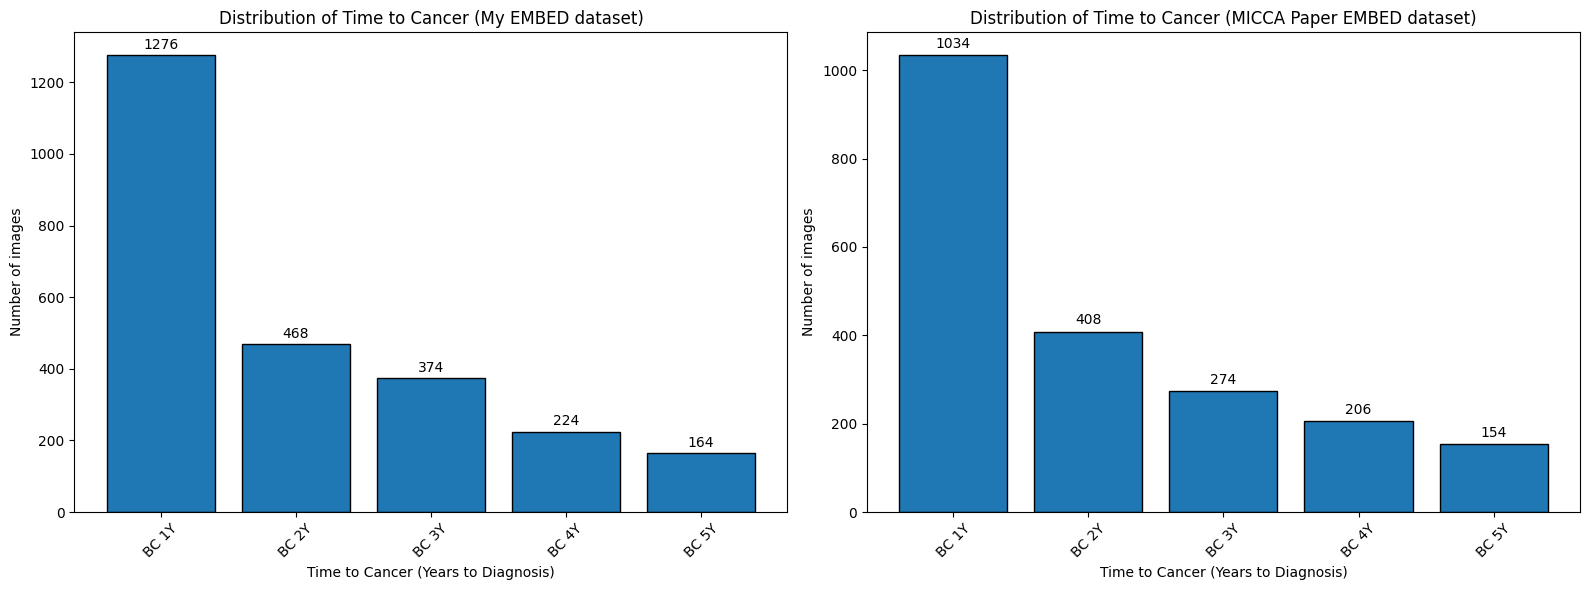

In [84]:
# Count the number of images in each bin
image_counts_per_bin = (
    df_final_img_time_cancer["time_to_cancer_group"].value_counts().sort_index()
)

# Print the counts for each bin
print(image_counts_per_bin)

# Values from the paper (for comparison)
values_paper = [1034, 408, 274, 206, 154]

# Create the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# First plot (Bar plot for Time to Cancer from your dataset)
axes[0].bar(
    image_counts_per_bin.index.tolist(),
    image_counts_per_bin.values.tolist(),
    edgecolor="black",
)
axes[0].set_xlabel("Time to Cancer (Years to Diagnosis)")
axes[0].set_ylabel("Number of images")
axes[0].tick_params(axis="x", rotation=45)
axes[0].set_title("Distribution of Time to Cancer (My EMBED dataset)")

# Add values above the bars for the first plot
for i, value in enumerate(image_counts_per_bin.values):
    axes[0].text(
        i, value + 10, str(value), ha="center", va="bottom", fontsize=10
    )  # Adjust the position as needed

# Second plot (Bar plot for Time to Cancer from 'values_paper')
axes[1].bar(
    ["BC 1Y", "BC 2Y", "BC 3Y", "BC 4Y", "BC 5Y"], values_paper, edgecolor="black"
)
axes[1].set_xlabel("Time to Cancer (Years to Diagnosis)")
axes[1].set_ylabel("Number of images")
axes[1].tick_params(axis="x", rotation=45)
axes[1].set_title("Distribution of Time to Cancer (MICCA Paper EMBED dataset)")

# Add values above the bars for the second plot
for i, value in enumerate(values_paper):
    axes[1].text(
        i, value + 10, str(value), ha="center", va="bottom", fontsize=10
    )  # Adjust the position as needed

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

# fixing dicom file paths to the local ones.

In [86]:
def anon_dicom_path_fix(DICOMPathStr):
    return DICOMPathStr.replace("/mnt/NAS2/mammo/anon_dicom", "/storage2/images")


result_df_pos_group = df_final_img_time_cancer.copy()
result_df_pos_group["anon_dicom_path_local"] = result_df_pos_group[
    "anon_dicom_path"
].apply(anon_dicom_path_fix)
result_df_pos_group_final = result_df_pos_group.rename(
    columns={
        "empi_anon": "patient_id",
        "acc_anon": "exam_id",
        "ImageLateralityFinall": "laterality",
        "ViewPosition": "view",
        "anon_dicom_path_local": "file_path_dcm",
    }
)
result_df_pos_group_final = result_df_pos_group_final.drop(
    columns=[
        "anon_dicom_path",
        "StudyID",
        "numfind",
        "tissueden",
        "SeriesDescription",
        "asses",
        "path_severity",
        "bside",
        "side",
        "StudyDescription",
        "FinalImageType",
    ]
)

display(result_df_pos_group_final)

result_df_pos_group_final.to_csv(
    "/content/POSITIVE_GROUP_FINAL_2D_only.csv", index=False
)
print(result_df_pos_group_final["patient_id"].nunique())

,patient_id,exam_id,diagnosed_date_anon,procdate_anon,total_L_find,total_R_find,Label,study_date_anon,ImageLateralityFinal,view,num_roi,ROI_coords,Manufacturer,ProtocolName,WindowCenter,WindowWidth,has_pix_array,category,VOILUTFunction,WindowCenterWidthExplanation,diagnosed_date_anon_year,study_date_year,Time_to_Cancer_Years,time_to_cancer_group,file_path_dcm
0,10119504,5579010047669510,2014-02-10,NaT,NaN,NaN,Non-Cancer,2013-01-19,L,CC,0.0,(),"HOLOGIC, Inc.",LCC,2047.0,4096.0,False,no image,NaN,NaN,2014,2013,1,BC 1Y,/storage2/images/cohort_2/10119504/1.2.846.113...
1,10119504,5579010047669510,2014-02-10,NaT,NaN,NaN,Non-Cancer,2013-01-19,L,MLO,0.0,(),"HOLOGIC, Inc.",LMLO,2047.0,4096.0,False,no image,NaN,NaN,2014,2013,1,BC 1Y,/storage2/images/cohort_2/10119504/1.2.846.113...
2,10119504,5579010047669510,2014-02-10,NaT,NaN,NaN,Non-Cancer,2013-01-19,L,MLO,0.0,(),"HOLOGIC, Inc.",LMLO,2047.0,4096.0,False,no image,NaN,NaN,2014,2013,1,BC 1Y,/storage2/images/cohort_2/10119504/1.2.846.113...
3,10119504,9436120411494617,2014-02-10,NaT,NaN,NaN,Non-Cancer,2013-06-29,L,CC,0.0,(),"HOLOGIC, Inc.",LCC,2047.0,4096.0,False,no image,NaN,NaN,2014,2013,1,BC 1Y,/storage2/images/cohort_2/10119504/1.2.847.113...
4,10119504,9436120411494617,2014-02-10,NaT,NaN,NaN,Non-Cancer,2013-06-29,L,MLO,0.0,(),"HOLOGIC, Inc.",LMLO,2047.0,4096.0,False,no image,NaN,NaN,2014,2013,1,BC 1Y,/storage2/images/cohort_2/10119504/1.2.847.113...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3085,99868531,8969515521433877,2019-06-07,NaT,NaN,NaN,Non-Cancer,2019-04-01,R,MLO,1.0,"((2120, 198, 2410, 724),)","HOLOGIC, Inc.",R MLO ComboHD,2047.0,4096.0,False,no image,NaN,NaN,2019,2019,0,BC 1Y,/storage2/images/cohort_1/99868531/1.2.849.113...
3086,99868531,9090933158477514,2019-06-07,NaT,NaN,NaN,Non-Cancer,2015-06-21,R,MLO,0.0,(),"HOLOGIC, Inc.",R MLO,2047.0,4096.0,False,no image,NaN,NaN,2019,2015,4,BC 4Y,/storage2/images/cohort_1/99868531/1.2.840.113...
3087,99868531,9090933158477514,2019-06-07,NaT,NaN,NaN,Non-Cancer,2015-06-21,R,CC,0.0,(),"HOLOGIC, Inc.",R CC,2047.0,4096.0,False,no image,NaN,NaN,2019,2015,4,BC 4Y,/storage2/images/cohort_1/99868531/1.2.840.113...
3088,99868531,9161828304530939,2019-06-07,NaT,NaN,NaN,Non-Cancer,2016-02-01,R,CC,0.0,(),"HOLOGIC, Inc.",R CC,2047.0,4096.0,False,no image,NaN,NaN,2019,2016,3,BC 3Y,/storage2/images/cohort_1/99868531/1.2.846.113...


377
